In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pre-Processing :

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

## EDA :

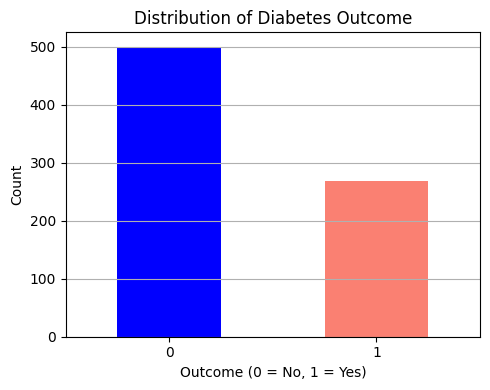

In [11]:
plt.figure(figsize=(5,4))
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'salmon'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

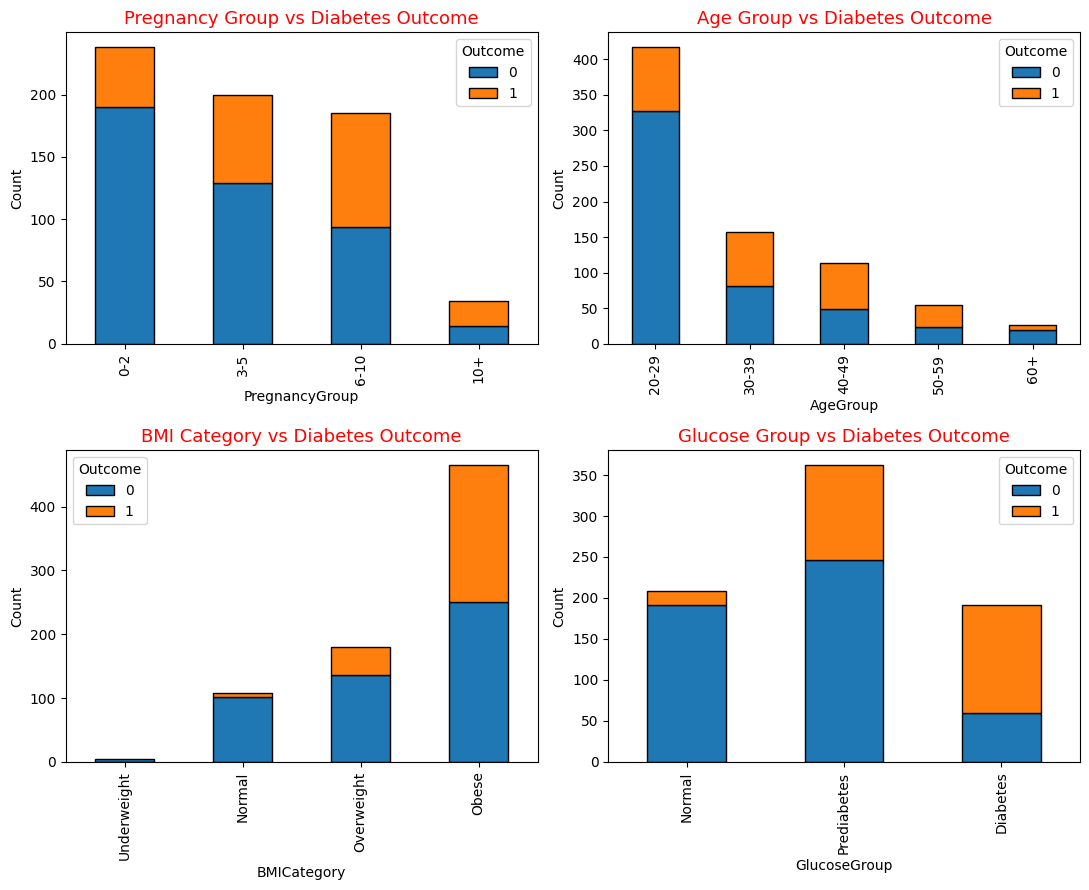

In [ ]:
# Define feature groupings
df['PregnancyGroup'] = pd.cut(df['Pregnancies'], bins=[0,2,5,10,20], labels=['0-2','3-5','6-10','10+'])
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,80], labels=['20-29','30-39','40-49','50-59','60+'])
df['BMICategory'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])
df['GlucoseGroup'] = pd.cut(df['Glucose'], bins=[0,100,140,200], labels=['Normal','Prediabetes','Diabetes'])

# Features to plot
group_features = ['PregnancyGroup', 'AgeGroup', 'BMICategory', 'GlucoseGroup']
titles = ['Pregnancy Group vs Diabetes Outcome',
          'Age Group vs Diabetes Outcome',
          'BMI Category vs Diabetes Outcome',
          'Glucose Group vs Diabetes Outcome']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(11,9))
axes = axes.flatten()

for i, feature in enumerate(group_features):
    pd.crosstab(df[feature], df['Outcome']).plot(
        kind="bar", stacked=True, ax=axes[i], colormap="Paired", edgecolor="black",color=['#1f77b4', '#ff7f0e'])
    axes[i].set_title(titles[i],fontsize=13, color='red')
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

from matplotlib.colors import ListedColormap

def plot_decision_boundaries_diabetes(model, X, y, feature1, feature2, sample_size=200):
    # Subsample dataset for clarity
    if len(X) > sample_size:
        X_sample = X.sample(sample_size, random_state=42)
        y_sample = y.loc[X_sample.index]
    else:
        X_sample, y_sample = X, y

    X_plot = X_sample[[feature1, feature2]].values
    y_sample = np.array(y_sample)

    # Create meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(grid_points).reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1],
                          c=y_sample,
                          cmap=ListedColormap(['red', 'green']),
                          edgecolor='k')

    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='No Diabetes (0)',
               markerfacecolor='red', markersize=8, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='Diabetes (1)',
               markerfacecolor='green', markersize=8, markeredgecolor='k')
    ]
    plt.legend(handles=legend_elements, loc="upper right")

    plt.xlabel(feature1, fontsize=14)
    plt.ylabel(feature2, fontsize=14)
    plt.title("Naive Bayes Decision Boundary", fontsize=15, fontweight='bold')
    plt.show()


## Model Building :

In [11]:
X = df[['Glucose', 'BloodPressure', 'BMI', 'Age']]  # Input features
y = df['Outcome']   # Target variable

In [12]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 4) (154, 4)
(614,) (154,)


In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
# Training the Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
# Prediction
y_pred = gnb.predict(X_test)

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points :{(y_test != y_pred).sum()}")

Number of mislabeled points out of a total 154 points :42


## Evaluation :

In [17]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [18]:
# Feature names in order
feature_names = [ 'Glucose', 'BloodPressure', 'BMI',  'Age']

# Collect input values from user
print("Enter the following values to predict diabetes :")
user_input = []

for feature in feature_names:
    val = float(input(f"Enter {feature} value: "))
    user_input.append(val)

# Convert to NumPy array and reshape for prediction
user_data = np.array(user_input).reshape(1, -1)

# Make prediction
prediction = gnb.predict(user_data)

# Show result
if prediction[0] == 1:
    print("👉 Outcome :",prediction[0])
    print("The model predicts: Diabetes Positive ✅")
else:
    print("👉 Outcome : ",prediction[0])
    print("The model predicts: Diabetes Negative ❌")


Enter the following values to predict diabetes :
👉 Outcome :  0
The model predicts: Diabetes Negative ❌


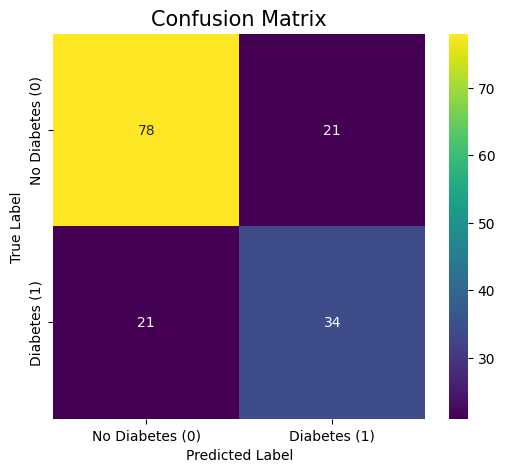

In [23]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=15)
plt.show()